### 1.Importing used libraries

In [2]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\bsbs
[nltk_data]     meow\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\bsbs
[nltk_data]     meow\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### 2.Data Preprocessing

In [3]:
# load the data
data = pd.read_csv("Emotion_classify_data.csv")

#drop missing values
data = data.dropna()

#Show the first few rows
data.head()


,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear


In [4]:
# Tokenization
data['tokens'] = data['Comment'].apply(word_tokenize)

# Stemming
stemmer = PorterStemmer()
data['stemmed'] = data['tokens'].apply(lambda x: [stemmer.stem(token) for token in x])

# Lemmatization
lemmatizer = WordNetLemmatizer()
data['lemmatized'] = data['tokens'].apply(lambda x: [lemmatizer.lemmatize(token) for token in x])

# Display the first few rows with tokenization, stemming, and lemmatization
print(data[['tokens', 'stemmed', 'lemmatized']].head())


                                              tokens  \
0  [i, seriously, hate, one, subject, to, death, ...   
1        [im, so, full, of, life, i, feel, appalled]   
2  [i, sit, here, to, write, i, start, to, dig, o...   
3  [ive, been, really, angry, with, r, and, i, fe...   
4  [i, feel, suspicious, if, there, is, no, one, ...   

                                             stemmed  \
0  [i, serious, hate, one, subject, to, death, bu...   
1           [im, so, full, of, life, i, feel, appal]   
2  [i, sit, here, to, write, i, start, to, dig, o...   
3  [ive, been, realli, angri, with, r, and, i, fe...   
4  [i, feel, suspici, if, there, is, no, one, out...   

                                          lemmatized  
0  [i, seriously, hate, one, subject, to, death, ...  
1        [im, so, full, of, life, i, feel, appalled]  
2  [i, sit, here, to, write, i, start, to, dig, o...  
3  [ive, been, really, angry, with, r, and, i, fe...  
4  [i, feel, suspicious, if, there, is, no, one, ..

In [5]:
# Convert the stemmed words into a bag-of-words representation
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['stemmed'].apply(lambda x: ' '.join(x)))

# Split the data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, data['Emotion'], test_size=0.1)

### 2.Naive Bayes

In [6]:
NB = MultinomialNB()

#Training model
NB.fit(X_train, y_train)

#Predicting Model
prediction = NB.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, prediction))


Naive Bayes Accuracy: 0.8956228956228957


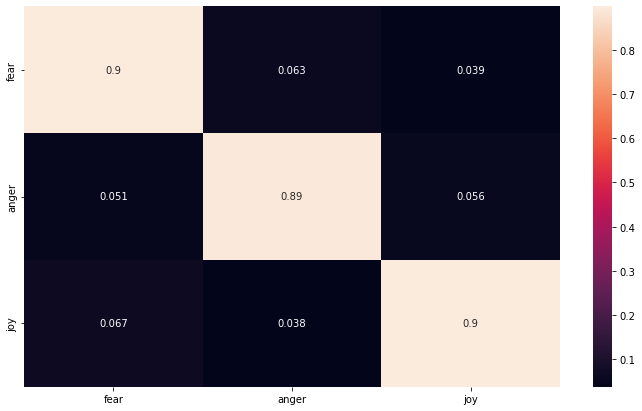

In [8]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

unique_labels = data.Emotion.unique()
cf_matrix = confusion_matrix(y_test, prediction)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in unique_labels],
                     columns = [i for i in unique_labels])

plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)
plt.savefig('output.png')

### 3.Logistic regression

In [16]:
model = LogisticRegression(max_iter=1000)

#training model
model.fit(X_train, y_train)

#prediction model
prediction = model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, prediction))



Logistic Regression Accuracy: 0.9175084175084175


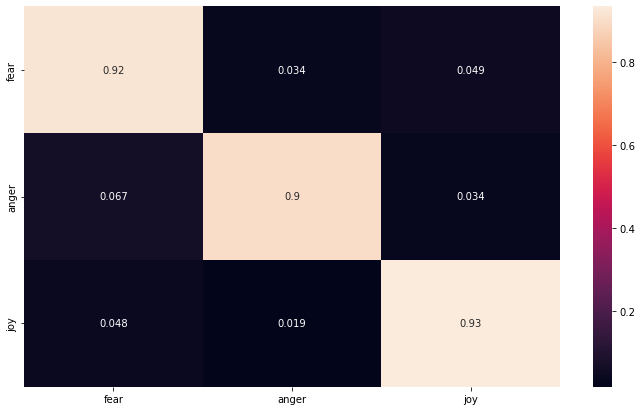

In [18]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

unique_labels = data.Emotion.unique()
cf_matrix = confusion_matrix(y_test, prediction)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in unique_labels],
                     columns = [i for i in unique_labels])

plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)
plt.savefig('output.png')

### 4.Prediction

In [45]:
def predict_emotion(text):
    # Preprocess the input text
    tokens = word_tokenize(text)
    stemed = [stemmer.stem(token) for token in tokens]
    input_vector = vectorizer.transform([' '.join(stemed)])

    # Predict using both models
    lr = model.predict(input_vector)[0]
    nb = NB.predict(input_vector)[0]

    return lr, nb

# Test the function with sample texts
text1 = "The monster is in the closet"
text2 = "the scary movie was so fun"
text3 = "i adore this pizza,its my favourite"

result1 = predict_emotion(text1)
result2 = predict_emotion(text2)
result3 = predict_emotion(text3)

print("input Text: ",text1,"\nText 1 Prediction - Logistic Regression:", result1[0], "\nText 1 Prediction - Naive Bayes:", result1[1],"\n")
print("input Text: ",text2,"\nText 2 Prediction - Logistic Regression:", result2[0], "\nText 2 Prediction - Naive Bayes:", result2[1],"\n")
print("input Text: ",text3,"\nText 3 Prediction - Logistic Regression:", result3[0], "\nText 3 Prediction - Naive Bayes:", result3[1],"\n")

input Text:  The monster is in the closet 
Text 1 Prediction - Logistic Regression: joy 
Text 1 Prediction - Naive Bayes: fear 

input Text:  the scary movie was so fun 
Text 2 Prediction - Logistic Regression: joy 
Text 2 Prediction - Naive Bayes: fear 

input Text:  i adore this pizza,its my favourite 
Text 3 Prediction - Logistic Regression: anger 
Text 3 Prediction - Naive Bayes: anger 

